In [ ]:
# Set whether this notebook is run in colab or not
colab = True

In [ ]:
import os

In [ ]:
if colab:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if colab:
  base_dir = '/content/drive/MyDrive/green_areas_detection'
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/yolov7" "./"
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/weigths" "./"
else:
  base_dir = ''

In [ ]:
# IMPORTANT : from now on, we enter inside the `yolov7` folder
%cd yolov7

/content/yolov7


# LOAD AND PREPARE DATASET
We use $3$ images for the training : `19K35`, `19K38`, `18K11`.

We use $1$ image for the validation : `19K53`.  

We use $1$ image for the validation : `19K59`.  

We use all the four channels : RGB + infrared.

In [ ]:
from trees_detection_utils.dataset_handler import crop_images_and_bbs, save_bbs_as_txt, crop_images

In [ ]:
CROP_SIZE = 640
STEP = 320

## Training images
We create the folder `train`, with two subfolders.
1. `train\images`, containing the crops.
2. `train\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

train_image_names_list = ['18K11', '19K38', '19K35']

train_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in train_image_names_list]

train_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in train_image_names_list]

In [ ]:
crop_images_and_bbs(train_image_paths_list, train_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./train', infrared=True)

Processing image 18K11.tif


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 911/911 [00:11<00:00, 78.59it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.24, 3: 0.01, 4: 0.69, 6: 0.04, 9: 0.0}

Processing image 19K38.tif


100%|██████████| 875/875 [00:11<00:00, 78.56it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.23, 3: 0.0, 4: 0.7, 6: 0.03, 9: 0.0}

Processing image 19K35.tif


100%|██████████| 655/655 [00:08<00:00, 78.77it/s]

BBs frequencies assignment {0: 0.02, 1: 0.04, 2: 0.28, 3: 0.01, 4: 0.61, 6: 0.05, 9: 0.0}



## Validation images
We create the folder `val`, with two subfolders.
1. `val\images`, containing the crops.
2. `val\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

val_image_names_list = ['19K53']

val_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in val_image_names_list]

val_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in val_image_names_list]

In [ ]:
crop_images_and_bbs(val_image_paths_list, val_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./val', infrared=True)

Processing image 19K53.tif


100%|██████████| 855/855 [00:10<00:00, 78.21it/s]

BBs frequencies assignment {0: 0.01, 1: 0.04, 2: 0.28, 3: 0.01, 4: 0.64, 6: 0.03, 9: 0.0}



In [ ]:
save_bbs_as_txt(val_bbs_shp_paths_list[0], val_image_paths_list[0], output_file_path=None)

## Test images
We create the folder `test`, with two subfolders.
1. `test\images`, containing the crops.
2. `test\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

test_image_names_list = ['19K59']

test_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in test_image_names_list]

test_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in test_image_names_list]

In [ ]:
crop_images_and_bbs(test_image_paths_list, test_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./test', infrared=True)

Processing image 19K59.tif


100%|██████████| 944/944 [00:12<00:00, 78.03it/s]

BBs frequencies assignment {0: 0.01, 1: 0.03, 2: 0.24, 3: 0.01, 4: 0.65, 6: 0.05, 9: 0.0}



In [ ]:
save_bbs_as_txt(test_bbs_shp_paths_list[0], test_image_paths_list[0], output_file_path=None)

# YOLO MODEL
https://github.com/WongKinYiu/yolov7

In [ ]:
# Just to check GPU
!nvidia-smi

Fri Oct  6 12:32:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd yolov7

[Errno 2] No such file or directory: 'yolov7'
/content/yolov7


In [ ]:
!pip install -r requirements.txt ;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00


# Training


Train the model on the $3$ train images, with $1$ val image.

*(The starting point of this training is the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*

In [ ]:
#3 +1(53val) +1(59test) RUNNATO 5/10 14:10
!python train.py --epochs 25 --workers 8 --device 0 --batch-size 8 --data 'data.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

2023-10-05 12:15:05.666924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 12:15:06.662179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2023-10-5 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(rgb_only=False, weights='yolov7_training.pt', cfg='cfg/training/yolov7-tree.yaml', data='data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=25, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, q

*Remark : the printed scores (MAP; precision, recall, ...) are computed on the validation image. But pay attention that they are computed on the validation crops, not on whole full val image. In addition, pay attention that these scores are computed using particular confidence and iou_nms thresholds. So, you don't have to much high consideration on these scores.*

# Inference and evaluation on the whole validation image

In [ ]:
%cd yolov7

/content/yolov7


In [ ]:
from trees_detection_utils.inference import predict_on_img

### Inference

Perform inference on the whole validation image. The result of this is a single `.txt` file, containing all the bounding boxes on the whole validation image.

For now, we perform this inference by setting `conf_thres=0.25` and `iou_nms_thres=0.45`. These two very important inference parameters will be later tuned.

In [ ]:
path_to_weigths = 'weigths/best_infrared_train.pt'
image_path = os.path.join(base_dir, 'dataset/19K53/19K53.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', crop_size=CROP_SIZE, step=STEP,
               conf_thres=0.25, iou_nms_thres=0.45, intersect_thres=0.75, verbose=True,
               save_fig_pred_bbs=True, infrared=True)

CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 67.83it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.76it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 868/868 [00:00<00:00, 13564.70it/s]


Number of bbs after joining:, 17015
Number of bbs after NMS:, 5060
Number of bbs after enclosed bbs filtering:, 4431
FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 4431/4431 [00:00<00:00, 47654.11it/s]


Image saved
FINISH SAVING IMAGE


The model predicts $4431$ boxes on the whole validation image.

### Evaluation

Evaluate these predicted bounding boxes w.r.t. the ground truth ones, still on the whole val image.

In [ ]:
from trees_detection_utils.evaluation import visualize_errors_and_missings, evaluate_predicted_boxes

In [ ]:
# Save a figure containing both the ground truths and predictes boxes, both with the 
# missings and the errors
image_path = os.path.join(base_dir, 'dataset/19K53/19K53_RGB.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path,
                              iou_eval_thres=0.4, show=False)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 4785/4785 [00:00<00:00, 86937.71it/s]


Figure saved


4431it [00:49, 89.52it/s]


mAP: 0.62
Last precision: 0.72
Last recall: 0.67
Last f1: 0.70
Best f1: 0.70; index: 4089


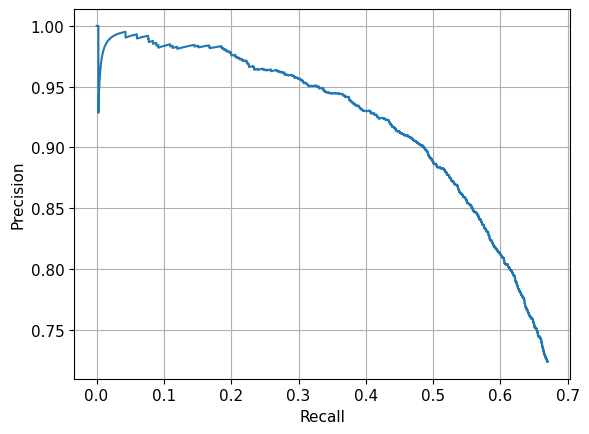

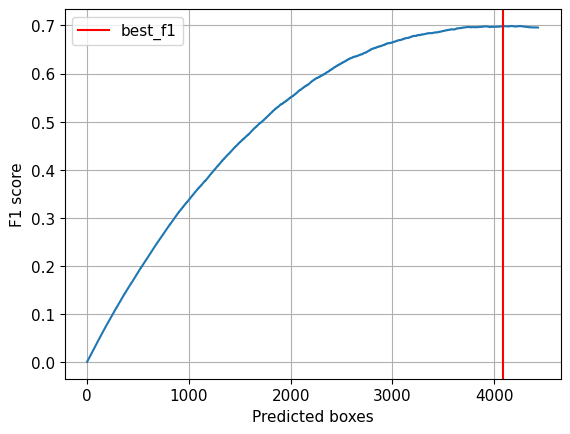

In [ ]:
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, plot_prec_rec=True, plot_f1=True, verbose=True)

Validation scores. 
- F1 score : $0.7$.
- Precision : $0.72$.
- Recall : $0.67$.
- MAP : $0.62$.

# Hyperparameters tuning

Let's now tune the two inference parameters `conf_thres` and `iou_nms_thrss` on the validation image.

Exaustive grid search among all possible couples of values.

This tuning is done w.r.t. the f1 score. This is the measure to monitor.

In [ ]:
from trees_detection_utils.evaluation import inference_parameters_tuning

[(0.1, 0.3), (0.1, 0.45), (0.1, 0.6), (0.15, 0.3), (0.15, 0.45), (0.15, 0.6), (0.2, 0.3), (0.2, 0.45), (0.2, 0.6), (0.25, 0.3), (0.25, 0.45), (0.25, 0.6), (0.3, 0.3), (0.3, 0.45), (0.3, 0.6), (0.35, 0.3), (0.35, 0.45), (0.35, 0.6), (0.4, 0.3), (0.4, 0.45), (0.4, 0.6), (0.45, 0.3), (0.45, 0.45), (0.45, 0.6), (0.5, 0.3), (0.5, 0.45), (0.5, 0.6)]
START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.08it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:11<00:00, 13.18it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 899/899 [00:00<00:00, 3357.61it/s]


Number of bbs after joining:, 22983
Number of bbs after NMS:, 6593
Number of bbs after enclosed bbs filtering:, 5927
FINISH UNIFY CROPS



5927it [01:06, 88.87it/s]


mAP: 0.66
Last precision: 0.59
Last recall: 0.73
Last f1: 0.65
Best f1: 0.70; index: 4208
mAP:0.6582218860804206 f1:0.6527259148618373 prec:0.5898430909397672 rec:0.7306165099268548
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.07it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:11<00:00, 13.16it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 899/899 [00:00<00:00, 11243.44it/s]


Number of bbs after joining:, 24698
Number of bbs after NMS:, 7574
Number of bbs after enclosed bbs filtering:, 5954
FINISH UNIFY CROPS



5954it [01:05, 91.30it/s]


mAP: 0.66
Last precision: 0.59
Last recall: 0.73
Last f1: 0.65
Best f1: 0.70; index: 4120
mAP:0.6576979183402237 f1:0.6497811714312319 prec:0.5859926100100773 rec:0.729153605015674
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 70.24it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:13<00:00, 12.87it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 899/899 [00:00<00:00, 10492.68it/s]


Number of bbs after joining:, 28199
Number of bbs after NMS:, 9426
Number of bbs after enclosed bbs filtering:, 5871
FINISH UNIFY CROPS



5871it [01:04, 91.71it/s]


mAP: 0.64
Last precision: 0.58
Last recall: 0.72
Last f1: 0.64
Best f1: 0.67; index: 3771
mAP:0.6416367554397212 f1:0.6433933933933934 prec:0.5838869017203202 rec:0.716405433646813
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.51it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:10<00:00, 13.37it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 884/884 [00:00<00:00, 3611.43it/s]


Number of bbs after joining:, 20179
Number of bbs after NMS:, 5734
Number of bbs after enclosed bbs filtering:, 5278
FINISH UNIFY CROPS



5278it [00:59, 88.42it/s]


mAP: 0.65
Last precision: 0.65
Last recall: 0.71
Last f1: 0.68
Best f1: 0.70; index: 4139
mAP:0.6468073486945978 f1:0.677134055450661 prec:0.645509662751042 rec:0.7120167189132707
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.18it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:10<00:00, 13.41it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 884/884 [00:00<00:00, 11771.32it/s]


Number of bbs after joining:, 21122
Number of bbs after NMS:, 6413
Number of bbs after enclosed bbs filtering:, 5322
FINISH UNIFY CROPS



5322it [00:57, 91.94it/s]


mAP: 0.65
Last precision: 0.64
Last recall: 0.71
Last f1: 0.68
Best f1: 0.70; index: 4194
mAP:0.6501433471810987 f1:0.6759671514791729 prec:0.6418639609169485 rec:0.7138975966562173
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.90it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:11<00:00, 13.17it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 884/884 [00:00<00:00, 12645.94it/s]


Number of bbs after joining:, 22899
Number of bbs after NMS:, 7514
Number of bbs after enclosed bbs filtering:, 5253
FINISH UNIFY CROPS



5253it [00:58, 90.06it/s]


mAP: 0.64
Last precision: 0.64
Last recall: 0.71
Last f1: 0.67
Best f1: 0.69; index: 3993
mAP:0.6413472007581789 f1:0.6732416816098824 prec:0.6432514753474206 rec:0.7061650992685475
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.93it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.72it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 876/876 [00:00<00:00, 13602.24it/s]


Number of bbs after joining:, 18221
Number of bbs after NMS:, 5100
Number of bbs after enclosed bbs filtering:, 4764
FINISH UNIFY CROPS



4764it [00:53, 89.49it/s]


mAP: 0.63
Last precision: 0.69
Last recall: 0.69
Last f1: 0.69
Best f1: 0.70; index: 4143
mAP:0.630660360790318 f1:0.6894962823332287 prec:0.6910159529806885 rec:0.6879832810867293
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:15<00:00, 62.80it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:09<00:00, 13.53it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 876/876 [00:00<00:00, 13507.83it/s]


Number of bbs after joining:, 18771
Number of bbs after NMS:, 5612
Number of bbs after enclosed bbs filtering:, 4802
FINISH UNIFY CROPS



4802it [00:52, 91.39it/s]


mAP: 0.64
Last precision: 0.69
Last recall: 0.69
Last f1: 0.69
Best f1: 0.70; index: 4223
mAP:0.6351027732337937 f1:0.6905184103473454 prec:0.6892961266139108 rec:0.6917450365726228
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:14<00:00, 63.69it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.76it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 876/876 [00:00<00:00, 12944.97it/s]


Number of bbs after joining:, 19799
Number of bbs after NMS:, 6386
Number of bbs after enclosed bbs filtering:, 4775
FINISH UNIFY CROPS



4775it [00:51, 93.08it/s]


mAP: 0.63
Last precision: 0.69
Last recall: 0.69
Last f1: 0.69
Best f1: 0.69; index: 4139
mAP:0.6309310270671223 f1:0.6872384937238494 prec:0.6879581151832461 rec:0.6865203761755486
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:14<00:00, 64.22it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:07<00:00, 14.03it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 868/868 [00:00<00:00, 14799.17it/s]


Number of bbs after joining:, 16669
Number of bbs after NMS:, 4668
Number of bbs after enclosed bbs filtering:, 4399
FINISH UNIFY CROPS



4399it [00:47, 93.25it/s]


mAP: 0.62
Last precision: 0.73
Last recall: 0.67
Last f1: 0.69
Best f1: 0.70; index: 4145
mAP:0.6155087260050545 f1:0.6946864111498258 prec:0.7251648101841327 rec:0.6666666666666666
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.72it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:07<00:00, 13.95it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 868/868 [00:00<00:00, 14194.86it/s]


Number of bbs after joining:, 17015
Number of bbs after NMS:, 5060
Number of bbs after enclosed bbs filtering:, 4431
FINISH UNIFY CROPS



4431it [00:49, 90.19it/s]


mAP: 0.62
Last precision: 0.72
Last recall: 0.67
Last f1: 0.70
Best f1: 0.70; index: 4089
mAP:0.6194433417612185 f1:0.6957465277777778 prec:0.7235387045813586 rec:0.6700104493207941
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.53it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.87it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 868/868 [00:00<00:00, 14315.37it/s]


Number of bbs after joining:, 17602
Number of bbs after NMS:, 5632
Number of bbs after enclosed bbs filtering:, 4413
FINISH UNIFY CROPS



4413it [00:49, 89.81it/s]


mAP: 0.62
Last precision: 0.73
Last recall: 0.67
Last f1: 0.70
Best f1: 0.70; index: 4209
mAP:0.6196361956802089 f1:0.6958034355294629 prec:0.7251302968502152 rec:0.6687565308254964
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.76it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.89it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 860/860 [00:00<00:00, 14365.71it/s]


Number of bbs after joining:, 15272
Number of bbs after NMS:, 4248
Number of bbs after enclosed bbs filtering:, 4048
FINISH UNIFY CROPS



4048it [00:45, 88.94it/s]


mAP: 0.60
Last precision: 0.76
Last recall: 0.64
Last f1: 0.70
Best f1: 0.70; index: 3910
mAP:0.5974537513457947 f1:0.6962526887807087 prec:0.7596343873517787 rec:0.6426332288401254
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.75it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:08<00:00, 13.85it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 860/860 [00:00<00:00, 14875.38it/s]


Number of bbs after joining:, 15502
Number of bbs after NMS:, 4565
Number of bbs after enclosed bbs filtering:, 4081
FINISH UNIFY CROPS



4081it [00:47, 85.22it/s]


mAP: 0.60
Last precision: 0.76
Last recall: 0.65
Last f1: 0.70
Best f1: 0.70; index: 3939
mAP:0.601758111556524 f1:0.6977216332055042 prec:0.757902474883607 rec:0.6463949843260188
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:15<00:00, 59.35it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:09<00:00, 13.53it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 860/860 [00:00<00:00, 15015.89it/s]


Number of bbs after joining:, 15840
Number of bbs after NMS:, 5017
Number of bbs after enclosed bbs filtering:, 4066
FINISH UNIFY CROPS



4066it [00:46, 87.11it/s]


mAP: 0.60
Last precision: 0.76
Last recall: 0.65
Last f1: 0.70
Best f1: 0.70; index: 4065
mAP:0.6031307595866406 f1:0.699130041803186 prec:0.7609444171175602 rec:0.6466039707419018
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:14<00:00, 66.65it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:09<00:00, 13.64it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 854/854 [00:00<00:00, 3396.23it/s]


Number of bbs after joining:, 14081
Number of bbs after NMS:, 3917
Number of bbs after enclosed bbs filtering:, 3756
FINISH UNIFY CROPS



3756it [00:42, 89.26it/s]


mAP: 0.58
Last precision: 0.79
Last recall: 0.62
Last f1: 0.70
Best f1: 0.70; index: 3752
mAP:0.5801039500218385 f1:0.6950005854115444 prec:0.7902023429179978 rec:0.6202716823406479
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.25it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:07<00:00, 14.02it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 854/854 [00:00<00:00, 14348.46it/s]


Number of bbs after joining:, 14192
Number of bbs after NMS:, 4166
Number of bbs after enclosed bbs filtering:, 3781
FINISH UNIFY CROPS



3781it [00:41, 91.29it/s]


mAP: 0.58
Last precision: 0.79
Last recall: 0.62
Last f1: 0.70
Best f1: 0.70; index: 3776
mAP:0.5841043367355917 f1:0.6967079150128415 prec:0.7892092039143084 rec:0.6236154649947754
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 70.90it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:05<00:00, 14.39it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 854/854 [00:00<00:00, 3438.44it/s]


Number of bbs after joining:, 14393
Number of bbs after NMS:, 4536
Number of bbs after enclosed bbs filtering:, 3773
FINISH UNIFY CROPS



3773it [00:40, 92.85it/s]


mAP: 0.59
Last precision: 0.79
Last recall: 0.62
Last f1: 0.70
Best f1: 0.70; index: 3772
mAP:0.5853151949116968 f1:0.6971254966113578 prec:0.7906175457195865 rec:0.6234064785788924
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 70.31it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:05<00:00, 14.44it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 843/843 [00:00<00:00, 15124.53it/s]


Number of bbs after joining:, 12809
Number of bbs after NMS:, 3577
Number of bbs after enclosed bbs filtering:, 3453
FINISH UNIFY CROPS



3453it [00:37, 91.54it/s]


mAP: 0.55
Last precision: 0.82
Last recall: 0.59
Last f1: 0.68
Best f1: 0.68; index: 3450
mAP:0.554959160496018 f1:0.6841466375333819 prec:0.8161019403417318 rec:0.5889237199582027
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 71.00it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:05<00:00, 14.39it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 843/843 [00:00<00:00, 3398.38it/s]


Number of bbs after joining:, 12873
Number of bbs after NMS:, 3770
Number of bbs after enclosed bbs filtering:, 3471
FINISH UNIFY CROPS



3471it [00:39, 88.19it/s]


mAP: 0.56
Last precision: 0.82
Last recall: 0.59
Last f1: 0.69
Best f1: 0.69; index: 3465
mAP:0.5584295479444321 f1:0.6858042635658914 prec:0.8156150965139729 rec:0.5916405433646813
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 68.92it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:06<00:00, 14.28it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 843/843 [00:00<00:00, 14711.59it/s]


Number of bbs after joining:, 12971
Number of bbs after NMS:, 4074
Number of bbs after enclosed bbs filtering:, 3464
FINISH UNIFY CROPS



3464it [00:38, 90.46it/s]


mAP: 0.56
Last precision: 0.82
Last recall: 0.59
Last f1: 0.69
Best f1: 0.69; index: 3461
mAP:0.5595340440238544 f1:0.6859013213722875 prec:0.8166859122401847 rec:0.5912225705329154
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.13it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:04<00:00, 14.58it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 838/838 [00:00<00:00, 16001.51it/s]


Number of bbs after joining:, 11587
Number of bbs after NMS:, 3257
Number of bbs after enclosed bbs filtering:, 3163
FINISH UNIFY CROPS



3163it [00:34, 92.27it/s]


mAP: 0.53
Last precision: 0.85
Last recall: 0.56
Last f1: 0.67
Best f1: 0.67; index: 3159
mAP:0.5300924098438042 f1:0.6731253145445395 prec:0.8457160923174202 rec:0.5590386624869383
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.14it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:04<00:00, 14.55it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 838/838 [00:00<00:00, 17002.18it/s]


Number of bbs after joining:, 11623
Number of bbs after NMS:, 3406
Number of bbs after enclosed bbs filtering:, 3174
FINISH UNIFY CROPS



3174it [00:34, 91.14it/s]


mAP: 0.53
Last precision: 0.85
Last recall: 0.56
Last f1: 0.67
Best f1: 0.68; index: 3171
mAP:0.5331270725491063 f1:0.6749591657243373 prec:0.8462507876496534 rec:0.561337513061651
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 71.00it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:05<00:00, 14.44it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 838/838 [00:00<00:00, 17099.62it/s]


Number of bbs after joining:, 11661
Number of bbs after NMS:, 3654
Number of bbs after enclosed bbs filtering:, 3170
FINISH UNIFY CROPS



3170it [00:34, 92.70it/s]


mAP: 0.53
Last precision: 0.85
Last recall: 0.56
Last f1: 0.68
Best f1: 0.68; index: 3168
mAP:0.5349808467171838 f1:0.675801382778127 prec:0.8479495268138801 rec:0.561755485893417
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:14<00:00, 65.64it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:04<00:00, 14.64it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 832/832 [00:00<00:00, 17671.76it/s]


Number of bbs after joining:, 10323
Number of bbs after NMS:, 2897
Number of bbs after enclosed bbs filtering:, 2834
FINISH UNIFY CROPS



2834it [00:30, 92.16it/s]


mAP: 0.49
Last precision: 0.87
Last recall: 0.52
Last f1: 0.65
Best f1: 0.65; index: 2833
mAP:0.4947953392274096 f1:0.6507415671347946 prec:0.8747353563867325 rec:0.5180773249738767
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 70.36it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:07<00:00, 13.93it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 832/832 [00:00<00:00, 18366.93it/s]


Number of bbs after joining:, 10343
Number of bbs after NMS:, 3007
Number of bbs after enclosed bbs filtering:, 2841
FINISH UNIFY CROPS



2841it [00:31, 91.55it/s]


mAP: 0.50
Last precision: 0.88
Last recall: 0.52
Last f1: 0.65
Best f1: 0.65; index: 2836
mAP:0.49702802728976475 f1:0.6522423288749016 prec:0.8753959873284055 rec:0.5197492163009404
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:13<00:00, 69.99it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:04<00:00, 14.60it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 832/832 [00:00<00:00, 3311.93it/s]


Number of bbs after joining:, 10367
Number of bbs after NMS:, 3211
Number of bbs after enclosed bbs filtering:, 2841
FINISH UNIFY CROPS



2841it [00:30, 91.96it/s]


mAP: 0.50
Last precision: 0.88
Last recall: 0.52
Last f1: 0.65
Best f1: 0.65; index: 2838
mAP:0.4996077819709735 f1:0.6538158929976396 prec:0.877507919746568 rec:0.5210031347962383
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6

BEST HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6
mAP:0.6031307595866406 f1:0.699130041803186 prec:0.7609444171175602 rec:0.6466039707419018


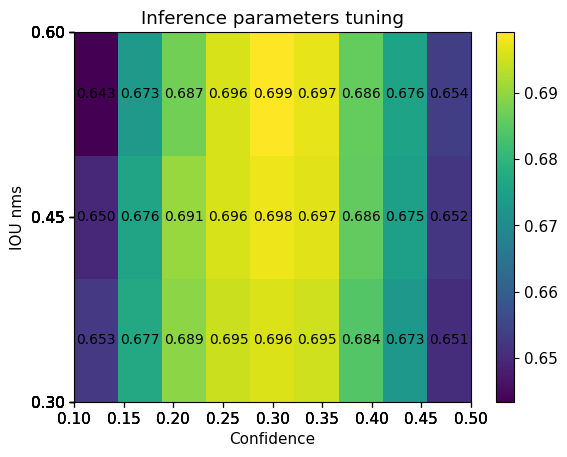

In [ ]:
%matplotlib inline
path_to_weigths = 'weigths/best_infrared_train.pt'
image_path = os.path.join(base_dir, 'dataset/19K53/19K53.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K53/19K53_boxes.txt')
conf_thres_list = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
iou_nms_thres_list = [0.3, 0.45, 0.6]
hyperparameters_metrics_dict = inference_parameters_tuning(path_to_weigths, image_path, gt_boxes_txt_path, conf_thres_list, iou_nms_thres_list,
                                                           infrared=True, crop_size=CROP_SIZE, step=STEP, preferred_metric='f1', iou_eval_thres=0.4,
                                                           plot=True)

Results of the tuning.
- Best values : `best_conf=0.3` and `best_iou_nms=0.6`.
- F1 score : $0.699$.
- Precision : $0.761$ ; Recall : $0.647$.
- MAP : $0.603$.

In [ ]:
best_conf = 0.3
best_iou_nms = 0.6

# Test

Let's now perform a training on the train + validation : we call this **full training**. This is our final model. *(The starting point of this training is still the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*

We then test this final model on the test image. The inference is run using the best inference parameters found before with the tuning.

### Full training

In [ ]:
%mkdir full_train
%cp -r train/images full_train/
%cp -r train/labels full_train/
%cp -r val/images full_train/
%cp -r val/labels full_train/

In [ ]:
!python train.py --epochs 30 --workers 8 --device 0 --batch-size 8 --data 'data_fulltrain.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

2023-10-05 16:54:15.427069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 16:54:16.400555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2023-10-5 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(rgb_only=False, weights='yolov7_training.pt', cfg='cfg/training/yolov7-tree.yaml', data='data_fulltrain.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=30, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_o

### Inference

In [ ]:
path_to_weigths = 'weigths/best_infrared_fulltrain.pt'
image_path = os.path.join(base_dir, 'dataset/19K59/19K59.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', infrared=True, crop_size=CROP_SIZE, step=STEP,
                   conf_thres=best_conf, iou_nms_thres=best_iou_nms, intersect_thres=0.75, verbose=True, save_fig_pred_bbs=True)

CROP IMAGE ...


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 945/945 [00:11<00:00, 79.02it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:12<00:00, 13.01it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 945/945 [00:00<00:00, 9913.50it/s]


Number of bbs after joining:, 37545
Number of bbs after NMS:, 11362
Number of bbs after enclosed bbs filtering:, 9626
FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 9626/9626 [00:00<00:00, 56035.59it/s]


Image saved
FINISH SAVING IMAGE


### Evaluation

In [ ]:
# Save a figure containing both the ground truths and predictes boxes, both with the 
# missings and the errors
image_path = os.path.join(base_dir, 'dataset/19K59/19K59_RGB.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, show=False)

100%|██████████| 8695/8695 [00:00<00:00, 94653.62it/s]


Figure saved


9626it [02:45, 58.10it/s]


mAP: 0.71
Last precision: 0.70
Last recall: 0.78
Last f1: 0.74
Best f1: 0.75; index: 8506


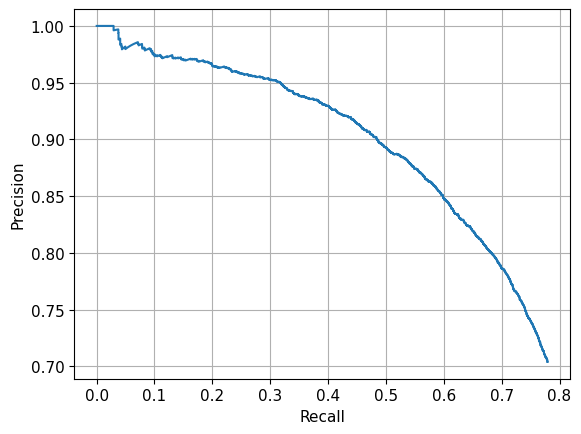

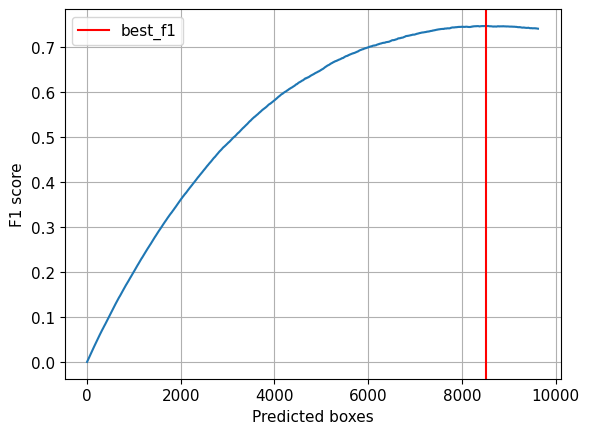

In [ ]:
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4,
                                                                   plot_prec_rec=True, plot_f1=True, verbose=True)

Final test scores. 
- F1 score : $0.74$.
- Precision : $0.70$.
- Recall : $0.78$.
- MAP : $0.71$.